In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Prep

In [85]:
df = pd.read_csv("./data/Train 2.csv")
df = df.drop(columns=["ID"], axis=1)

df = df.drop(columns=["Gender"], axis=1)

df_encoded = pd.get_dummies(df, drop_first=True)


df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,4,2,177,3,44,1233,1,False,False,True,False,False,False,True,False
1,4,5,216,2,59,3088,1,False,False,False,True,False,False,True,False
2,2,2,183,4,48,3374,1,False,False,False,False,False,False,True,False
3,3,3,176,4,10,1177,1,True,False,False,False,False,False,False,True
4,2,2,184,3,46,2484,1,False,True,False,False,False,False,False,True


## Data Train

In [86]:
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Model Performance

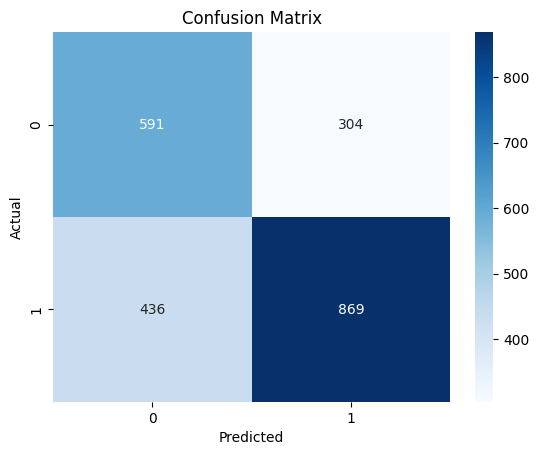

Accuracy: 0.6636363636363637


In [87]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))

In [88]:
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.6659003831417625


ROC AUC Score: 0.7399970033605171


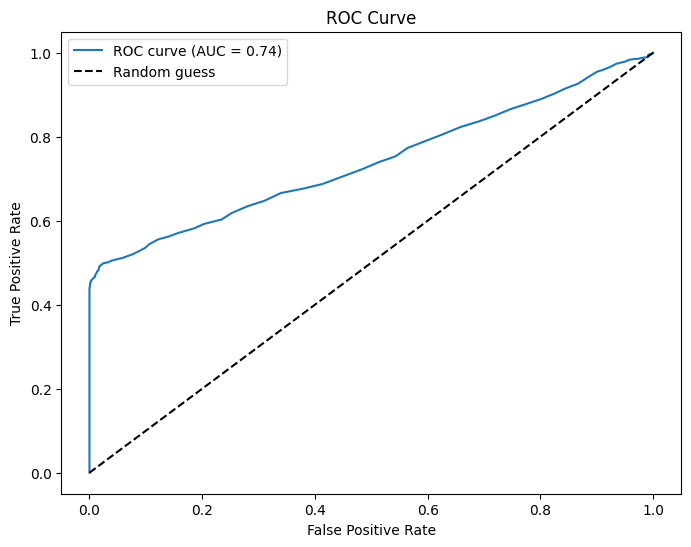

In [89]:
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy con threshold=0.3: 0.6045
Recall: 0.9632
Precision: 0.6046
ROC AUC: 0.7513
F1 Score: 0.7429


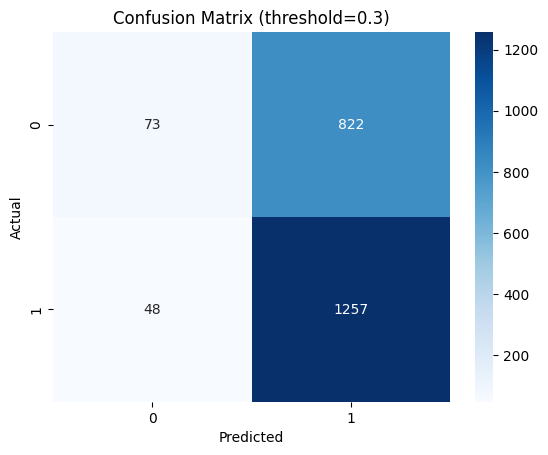

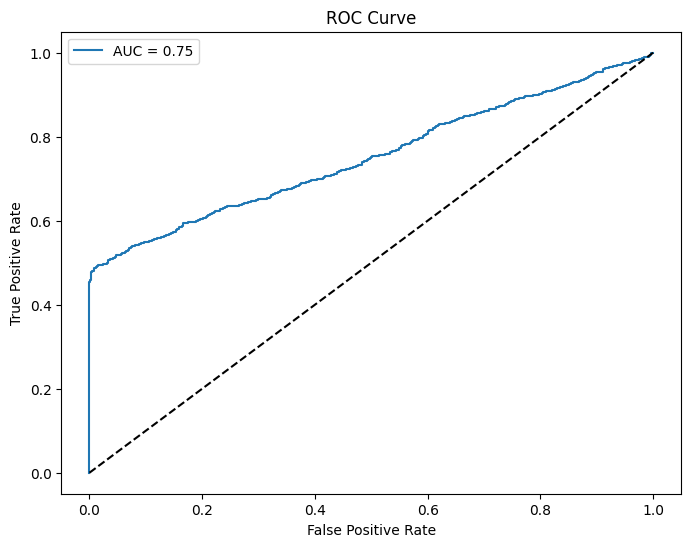

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv("./data/Train 2.csv")

# 2. Preprocesamiento
df.drop(columns=["ID", "Gender"], inplace=True)
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df = pd.get_dummies(df, drop_first=True)

# 3. Variables más importantes
important_features = [
    'Discount_offered',
    'Weight_in_gms',
    'Cost_of_the_Product',
    'Prior_purchases',
    'Customer_care_calls',
    'Customer_rating',
    'Product_importance'
]

X = df[important_features]
y = df['Reached.on.Time_Y.N']

# 4. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar modelo
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# 6. Predicción de probabilidades
y_proba = rf.predict_proba(X_test)[:, 1]

# 7. Clasificación con umbral personalizado
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

# 8. Métricas
acc = accuracy_score(y_test, y_pred_custom)
rec = recall_score(y_test, y_pred_custom)
prec = precision_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy con threshold={threshold}: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"ROC AUC: {auc:.4f}")
f1 = f1_score(y_test, y_pred_custom)
print(f"F1 Score: {f1:.4f}")

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()

# 10. Curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
